# Fit quality visualization notebook

### Installs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Make sure some required libraries are installed
!pip install --user -q arviz tqdm papermill

### Parameters changed by Papermill

In [3]:
package_path = '.'  # Where our Python package is (directory containing the __init__.py file)
models_path = '.'  # Directory where our .stan files are located 
model_name = 'reducedlinearmodelNegBinom'
roi = 'US_NY'
data_path = "../data"  # Directory containing the .csv data files
fits_path = "./fits"  # Directory containing the fit files
fit_format = 1  # 0: The one using a .csv of the samples; 1: The one pickling the fit instance and some other things

### Imports

In [4]:
%matplotlib inline
import sys
sys.path.insert(0, package_path)  # Make sure our package can be loaded
from __init__ import extract_samples, make_histograms, make_lineplots, get_timing, plot_data_and_fits
import logging
from pathlib import Path
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

### Load the fits and samples

In [5]:
samples = extract_samples(fits_path, models_path, model_name, roi, fit_format)

Loading reducedlinearmodelNegBinom from cache...


### Choose the parameter list

In [6]:
# List of parameters to visualize as a histogram; log binning is optional
hist_params = ['R0:log=True']

# List of parameters to visualize vs time
time_params = ['car', 'ifr']

### Visualize samples (one histogram and color per chain)

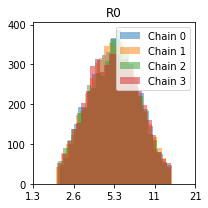

In [7]:
make_histograms(samples, hist_params, cols=4, size=3)

### Visualize samples across time

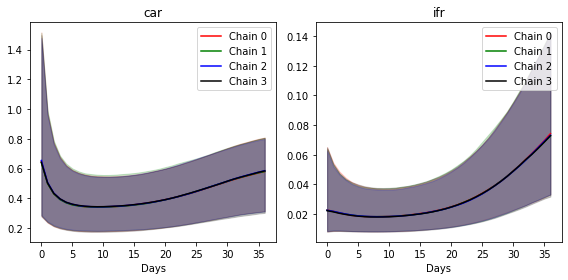

In [8]:
make_lineplots(samples, time_params, rows=4, cols=4, size=4)

### Visualize data and fits

1 03/05/20 18 03/22/20
t0 = 03/05/20 (day 1)
tm = 03/22/20 (day 18)
Empirical data for days {0, 38, 39, 40, 41, 42} is available but fit data for these days is missing


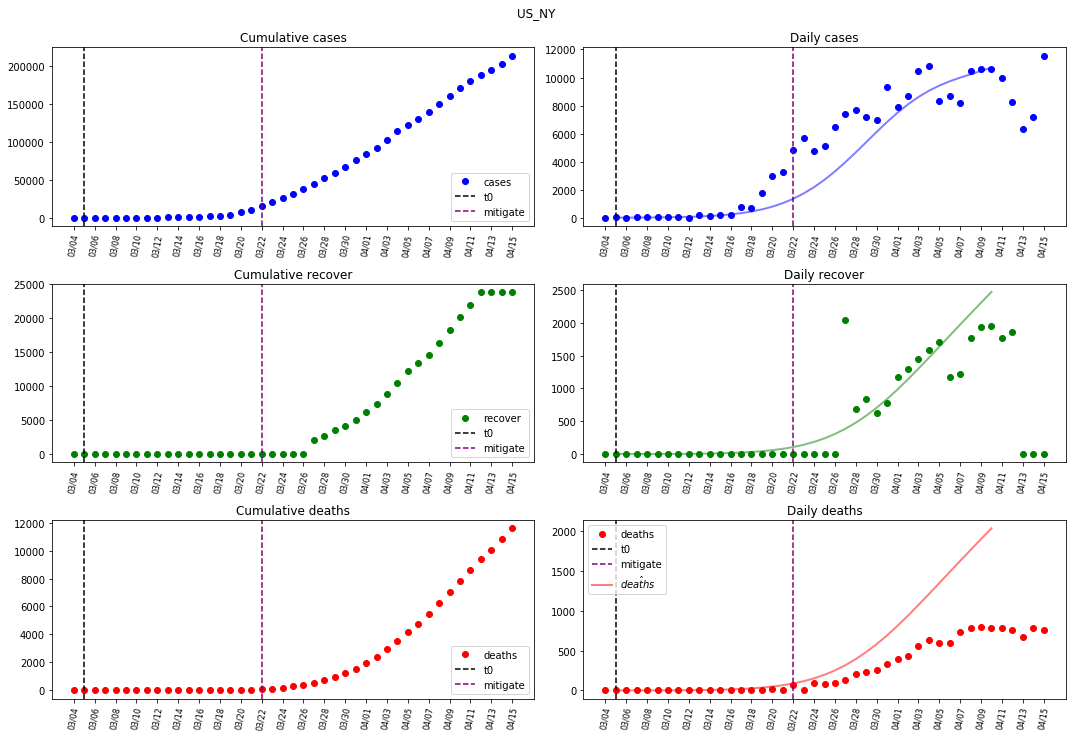

In [9]:
t0, tm = get_timing(roi, data_path)
plot_data_and_fits(data_path, roi, samples, t0, tm)